In [15]:
from __future__ import print_function, division
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

from PyAstronomy import pyasl
import matplotlib.pylab as plt
import pandas as pd

In [16]:
#recupearation all planets
# exoplanets_table = NasaExoplanetArchive.get_comfirmed_planets_table()

#afficher les données des exoplanetes
print('\nNEA : TAP_TABLES :\n',NasaExoplanetArchive.TAP_TABLES)


NEA : TAP_TABLES :
 ['spectra', 'superwasptimeseries', 'kelttimeseries', 'DI_STARS_EXEP', 'transitspec', 'emissionspec', 'ps', 'pscomppars', 'keplernames', 'k2names', 'ukirttimeseries', 'ml', 'object_aliases', 'k2pandc', 'TD', 'toi']


The following tables are now accessible by TAP query: 
Planetary Systems (PS), 
Planetary Systems Composite Parameters (PSCompPars), 
Kepler Names (keplernames), 
K2 Names (k2names), 
Emission Spectroscopy (emissionspec), 
Transmission Spectroscopy (transitspec), 
SuperWASP (superwasptimeseries), 
KELT (kelttimeseries), 
KIRT (ukirttimeseries), 
Object Aliases (formerly Aliases) (object_aliases), 
Microlensing (ML), 
SuperWASP (superwasptimeseries), 
KELT (kelttimeseries), 
K2 Planets 
Candidates (k2pandc).

In [17]:
t1 =NasaExoplanetArchive.query_criteria(table="ps", 
                                        select="distinct pl_name",
                                        #,where="pl_name like '%Kepler-10 %'"
                                        order ="pl_name"
                                       )
df1= t1.to_pandas()
print('\nNombre de lignes : ',len(df1),'\n',df1)


Nombre de lignes :  5566 
          pl_name
0       11 Com b
1       11 UMi b
2       14 And b
3       14 Her b
4     16 Cyg B b
...          ...
5561   ups And b
5562   ups And c
5563   ups And d
5564   ups Leo b
5565    xi Aql b

[5566 rows x 1 columns]


In [19]:
t2 =NasaExoplanetArchive.query_criteria(table="pscomppars", select="top 10 *")
df2 = t2.to_pandas()
colons = df2.columns.tolist()
print('\nNombre de colonnes : ',len(colons),'\n', colons,'\nNombre de lignes : \n',len(df2),'\n',df2)


UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]



Nombre de colonnes :  375 
 ['pl_name', 'pl_letter', 'hostname', 'hd_name', 'hip_name', 'tic_id', 'disc_pubdate', 'disc_year', 'discoverymethod', 'disc_locale', 'disc_facility', 'disc_instrument', 'disc_telescope', 'disc_refname', 'ra', 'rastr', 'dec', 'decstr', 'glon', 'glat', 'elon', 'elat', 'ra_reflink', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbperstr', 'pl_orbper_reflink', 'pl_orblpererr1', 'pl_orblper', 'pl_orblpererr2', 'pl_orblperlim', 'pl_orblperstr', 'pl_orblper_reflink', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbsmaxstr', 'pl_orbsmax_reflink', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_orbinclstr', 'pl_orbincl_reflink', 'pl_orbtper', 'pl_orbtpererr1', 'pl_orbtpererr2', 'pl_orbtperlim', 'pl_orbtperstr', 'pl_orbtper_reflink', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbeccenstr', 'pl_orbeccen_reflink', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl

In [20]:
t3 =NasaExoplanetArchive.query_criteria(table="pscomppars", 
                                        select=" distinct discoverymethod"
                                        #,where="discoverymethod like '%imagi%'"
                                       )
df3= t3.to_pandas()
print('\nNombre de lignes : ',len(df3),'\n',df3)


Nombre de lignes :  11 
                   discoverymethod
0       Transit Timing Variations
1                 Radial Velocity
2                         Transit
3   Orbital Brightness Modulation
4                 Disk Kinematics
5       Eclipse Timing Variations
6     Pulsation Timing Variations
7                      Astrometry
8                         Imaging
9                    Microlensing
10                  Pulsar Timing


In [21]:
t4 =NasaExoplanetArchive.query_criteria(table="pscomppars", 
                                        select=" distinct pl_name,discoverymethod,disc_year,pl_bmasse"
                                        ,where="discoverymethod like '%Imag%'"
                                        ,order="disc_year desc"
                                       )
df4= t4.to_pandas()
print('\nNombre de lignes : ',len(df4),'\n',df4)


Nombre de lignes :  69 
                       pl_name discoverymethod  disc_year   pl_bmasse
0                    AF Lep b         Imaging       2023  1017.05090
1                 HD 169142 b         Imaging       2023   953.48522
2               HIP 81208 C b         Imaging       2023  4703.86042
3                 HIP 99770 b         Imaging       2023  5117.03735
4                   MWC 758 c         Imaging       2023         NaN
..                        ...             ...        ...         ...
64                   Oph 11 b         Imaging       2006  4449.62000
65                   AB Pic b         Imaging       2005  4290.50000
66  2MASS J12073346-3932539 b         Imaging       2004  1589.15000
67                   DH Tau b         Imaging       2004  3496.00000
68                   GQ Lup b         Imaging       2004  6356.00000

[69 rows x 4 columns]


In [22]:
pd.set_option('display.max_columns', None)
t5 =NasaExoplanetArchive.query_criteria(table="pscomppars", 
            select=" distinct  pl_name, hostname, pl_letter, sy_snum, sy_pnum, sy_mnum, "+ 
            "discoverymethod,disc_year,disc_telescope,disc_instrument,   pl_rade, pl_radj, pl_bmasse, " +
            "pl_bmassj, pl_dens,st_spectype,st_rad, st_mass, st_metratio,  st_age, st_dens, "+
            "rastr, ra, decstr, dec, glat, glon, elat, elon, sy_dist, sy_gaiamag, sy_tmag"
            ,where="discoverymethod like '%Imag%'"
            ,order="disc_year desc"
                                       )
df5= t5.to_pandas()
print('\nNombre de lignes : ',len(df5),'\n',df5)


Nombre de lignes :  69 
                       pl_name                 hostname pl_letter  sy_snum  \
0                    AF Lep b                   AF Lep         b        1   
1                 HD 169142 b                HD 169142         b        1   
2               HIP 81208 C b              HIP 81208 C         b        3   
3                 HIP 99770 b                HIP 99770         b        1   
4                   MWC 758 c                  MWC 758         c        1   
..                        ...                      ...       ...      ...   
64                   Oph 11 b                   Oph 11         b        1   
65                   AB Pic b                   AB Pic         b        1   
66  2MASS J12073346-3932539 b  2MASS J12073346-3932539         b        1   
67                   DH Tau b                   DH Tau         b        1   
68                   GQ Lup b                   GQ Lup         b        1   

    sy_pnum  sy_mnum discoverymethod  disc_year  

In [23]:
t6 =NasaExoplanetArchive.query_criteria(table="pscomppars", 
            select=" distinct  pl_name, hostname, pl_letter, sy_snum, sy_pnum, sy_mnum, "+ 
            "discoverymethod,disc_year,disc_telescope,disc_instrument,   pl_rade, pl_radj, pl_bmasse, " +
            "pl_bmassj, pl_dens,st_spectype,st_rad, st_mass, st_metratio,  st_age, st_dens, "+
            "rastr, ra, decstr, dec, glat, glon, elat, elon, sy_dist, sy_gaiamag, sy_tmag"
            #,where="discoverymethod like '%Imag%'"
            ,order="disc_year desc"
                                       )
df6= t6.to_pandas()
print('\nNombre de lignes : ',len(df6),'\n',df6)


Nombre de lignes :  5566 
              pl_name      hostname pl_letter  sy_snum  sy_pnum  sy_mnum  \
0           75 Cet c        75 Cet         c        2        2        0   
1           AF Lep b        AF Lep         b        1        1        0   
2           AU Mic d        AU Mic         d        1        3        0   
3        BD-210397 b     BD-210397         b        1        2        0   
4        BD-210397 c     BD-210397         c        1        2        0   
...              ...           ...       ...      ...      ...      ...   
5561       ups And b       ups And         b        2        3        0   
5562        51 Peg b        51 Peg         b        1        1        0   
5563  PSR B1257+12 b  PSR B1257+12         b        1        3        0   
5564  PSR B1257+12 c  PSR B1257+12         c        1        3        0   
5565  PSR B1257+12 d  PSR B1257+12         d        1        3        0   

                discoverymethod  disc_year  \
0               Radial Ve

In [24]:
df6.to_csv("exoplanet_2023.csv",index=False)

In [46]:
import plotly.express as px
import pandas as pd
import numpy as np

#read csv to datafrtame
df7 = pd.read_csv('exoplanet_2023.csv', sep=',')
#df7=df7.dropna(axis=1)
print(df7)

             pl_name      hostname pl_letter  sy_snum  sy_pnum  sy_mnum  \
0           75 Cet c        75 Cet         c        2        2        0   
1           AF Lep b        AF Lep         b        1        1        0   
2           AU Mic d        AU Mic         d        1        3        0   
3        BD-210397 b     BD-210397         b        1        2        0   
4        BD-210397 c     BD-210397         c        1        2        0   
...              ...           ...       ...      ...      ...      ...   
5561       ups And b       ups And         b        2        3        0   
5562        51 Peg b        51 Peg         b        1        1        0   
5563  PSR B1257+12 b  PSR B1257+12         b        1        3        0   
5564  PSR B1257+12 c  PSR B1257+12         c        1        3        0   
5565  PSR B1257+12 d  PSR B1257+12         d        1        3        0   

                discoverymethod  disc_year  \
0               Radial Velocity       2023   
1      

In [47]:
print(df7["pl_bmasse"])
print(df7.sort_values(by='pl_bmasse'))

0        289.85951
1       1017.05090
2          1.05300
3        214.00000
4       1525.57635
           ...    
5561     218.53100
5562     146.20180
5563       0.02000
5564       4.30000
5565       3.90000
Name: pl_bmasse, Length: 5566, dtype: float64
             pl_name      hostname pl_letter  sy_snum  sy_pnum  sy_mnum  \
5563  PSR B1257+12 b  PSR B1257+12         b        1        3        0   
4476     Kepler-37 e     Kepler-37         e        1        4        0   
3734    Kepler-444 b    Kepler-444         b        3        5        0   
3917    Kepler-138 b    Kepler-138         b        1        4        0   
3735    Kepler-444 c    Kepler-444         c        3        5        0   
...              ...           ...       ...      ...      ...      ...   
3823  KIC 10001893 b  KIC 10001893         b        1        3        0   
3824  KIC 10001893 c  KIC 10001893         c        1        3        0   
3825  KIC 10001893 d  KIC 10001893         d        1        3        

In [48]:
df7['pl_bmasse']=df7['pl_bmasse'].replace(np.nan,0)

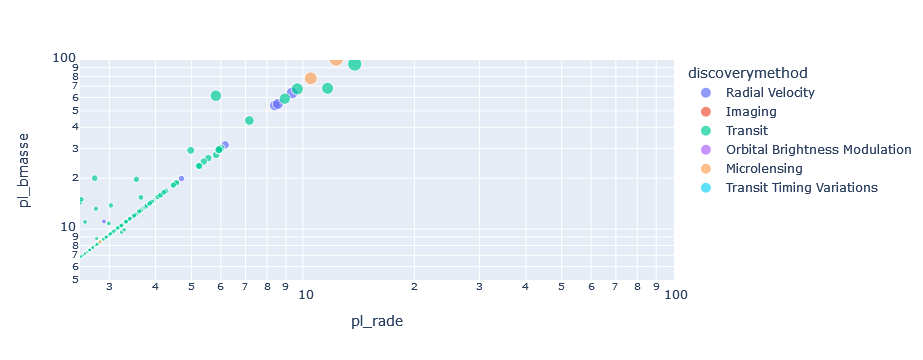

In [72]:
figa = px.scatter(
    df7.query("disc_year==2021"),
    #df7,
    x="pl_rade",
    y="pl_bmasse",
    color="discoverymethod",
    size="pl_bmasse",
    hover_name="pl_name",
    log_x=True,
    size_max=100,
    
    # facet_col="detection_type",
    range_x=[2.5,100.5],
    log_y = True, 
    range_y=[5.0,100.0]
    # animation_frame="discovered",
    # animation_group="name",
)
figa.show()

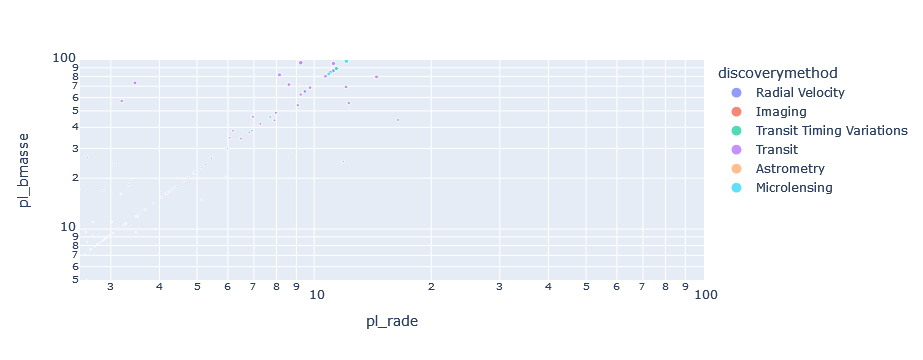

In [71]:
figb = px.scatter(
    df7.query("disc_year==2023"),
    #df7,
    x="pl_rade",
    y="pl_bmasse",
    color="discoverymethod",
    size="pl_bmasse",
    hover_name="pl_name",
    log_x=True,
    size_max=100,
    
    # facet_col="detection_type",
    range_x=[2.5,100.5],
    log_y = True, 
    range_y=[5.0,100.0]
    # animation_frame="discovered",
    # animation_group="name",
)
figb.show()

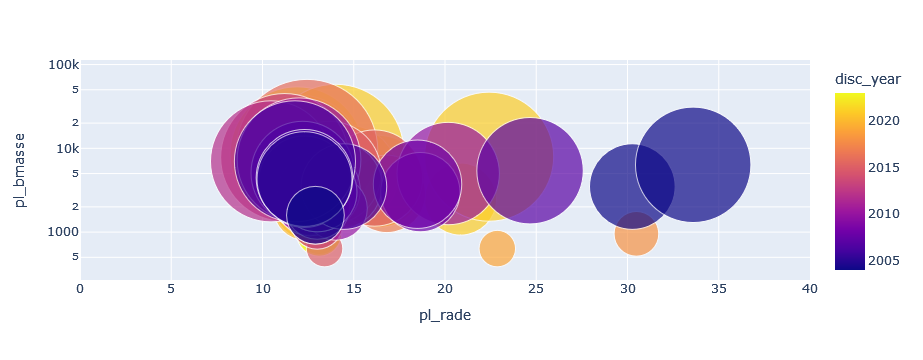

In [97]:
figc = px.scatter(
    df7.query("discoverymethod=='Imaging'"),
    #df7,
    x="pl_rade",
    y="pl_bmasse",
    color="disc_year",
    size="pl_bmasse",
    hover_name="pl_name",
    #log_x=True,
    size_max=100,
    
    # facet_col="detection_type",
    range_x=[0,40],
    log_y = True, 
    #range_y=[5.0,100.0]
    # animation_frame="discovered",
    # animation_group="name",
)
figc.show()

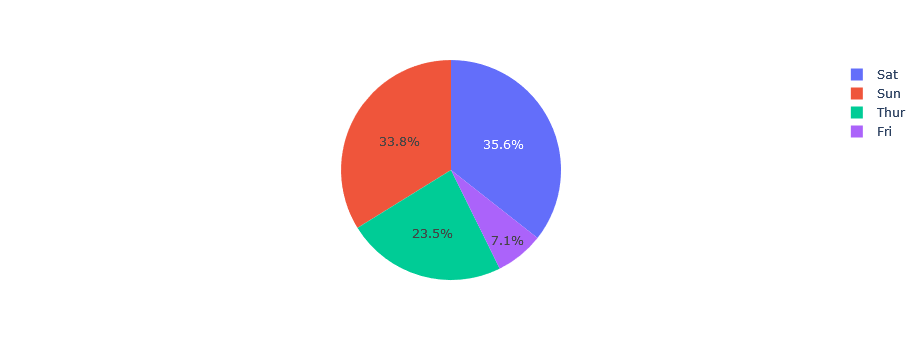

In [75]:
df = px.data.tips()
fig = px.pie(df, values='tip', names='day')
fig.show()

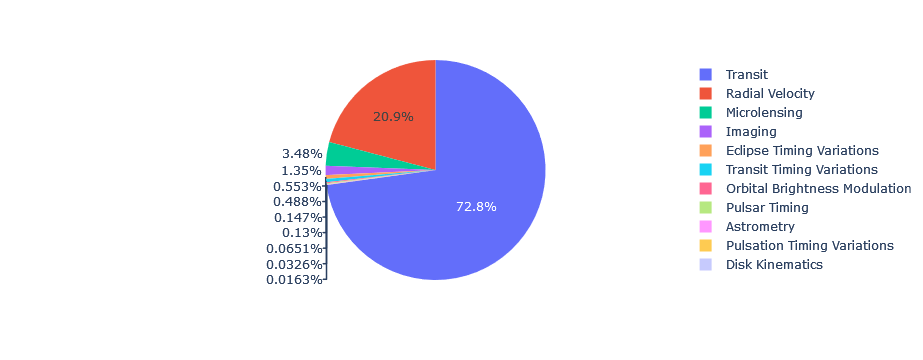

In [91]:
fig = px.pie(df7, values='sy_snum', names='discoverymethod')
fig.show()